In [1]:
#Importing libraries
import numpy as np
import pandas as pd

In [2]:
#Importing dataset
data_train=pd.read_csv('bigdatamart_Train.csv')
data_test=pd.read_csv('bigdatamart_Test.csv')

In [3]:
data_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df_train=pd.DataFrame(data_train)
df_test=pd.DataFrame(data_test)

EDA

In [5]:
df_train.shape

(8523, 12)

In [6]:
df_test.shape

(5681, 11)

In [ ]:
df_train.describe()

In [ ]:
df_test.describe()

In [ ]:
df_train.dtypes

In [7]:
df_train['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [8]:
df_train.drop(['Item_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier'],axis=1,inplace=True)
df_train.drop(['Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Outlet_Identifier'],axis=1,inplace=True)

In [ ]:
df_train.isnull().sum()

In [ ]:
df_test.isnull().sum()

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imp=SimpleImputer(strategy='most_frequent')
df_train['Item_Weight']=imp.fit_transform(df_train['Item_Weight'].values.reshape(-1,1))
df_train['Outlet_Size']=imp.fit_transform(df_train['Outlet_Size'].values.reshape(-1,1))
df_test['Item_Weight']=imp.fit_transform(df_test['Item_Weight'].values.reshape(-1,1))
df_test['Outlet_Size']=imp.fit_transform(df_test['Outlet_Size'].values.reshape(-1,1))

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
list=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list:
    df_train[val]=le.fit_transform(df_train[val].astype(str))

In [13]:
for val in list:
    df_test[val]=le.fit_transform(df_test[val].astype(str))

In [ ]:
df_train

In [ ]:
df_test

In [14]:
from scipy.stats import zscore
threhold=3
z=np.abs(zscore(df_train))
z

array([[0.81151126, 0.57284357, 0.97073217, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.60975569, 0.97809218, 0.90811123, ..., 1.09156913, 1.00297245,
        1.01844035],
       [1.12505806, 0.57284357, 0.95691733, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [0.50449417, 0.57284357, 0.59978449, ..., 0.13888236, 0.25265831,
        0.57909963],
       [1.30510027, 0.97809218, 1.53287976, ..., 1.09156913, 1.00297245,
        0.19672492],
       [0.48740719, 0.57284357, 0.41193591, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [15]:
zt=np.abs(zscore(df_test))
zt

array([[1.94956229, 0.57528374, 1.13407715, ..., 0.28473712, 1.369215  ,
        0.25276858],
       [0.92914563, 4.10469757, 0.53185019, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.52754995, 0.57528374, 0.6613164 , ..., 0.28473712, 1.0915602 ,
        1.50799439],
       ...,
       [0.53606904, 0.57528374, 0.15307374, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.68940501, 0.98471003, 1.28168987, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.6516798 , 0.98471003, 0.76171558, ..., 0.28473712, 0.1388274 ,
        0.25276858]])

In [16]:
df_train=df_train[(z<3).all(axis=1)]
df_test=df_test[(zt<3).all(axis=1)]

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\DC\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [18]:
df_train.shape

(8222, 10)

In [19]:
df_test.shape

(5525, 9)

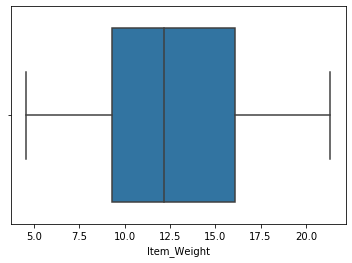

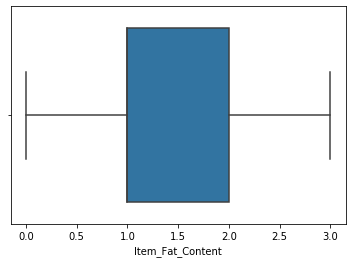

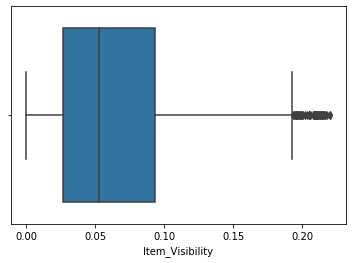

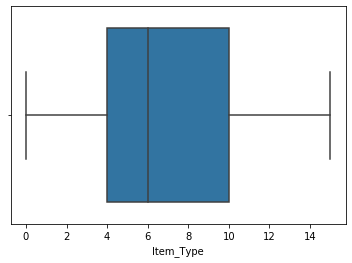

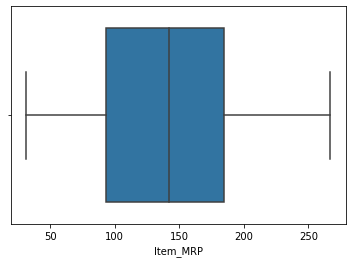

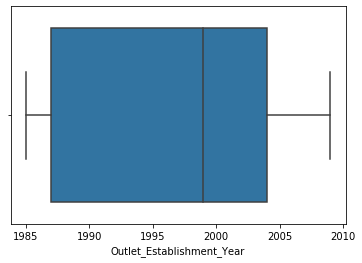

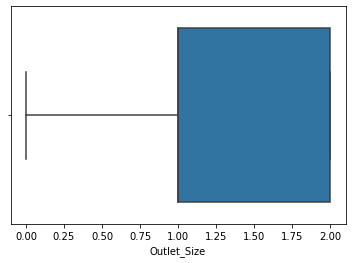

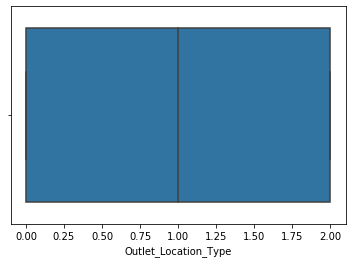

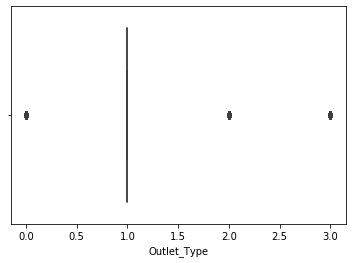

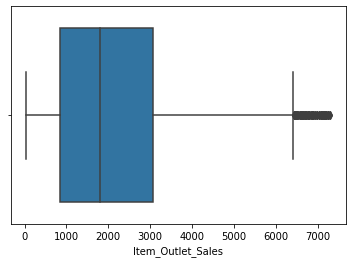

In [20]:
for i in df_train.columns:
    plt.figure()
    sns.boxplot(df_train[i])

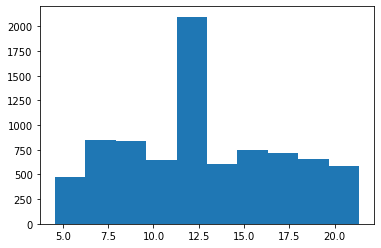

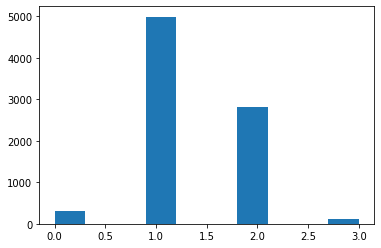

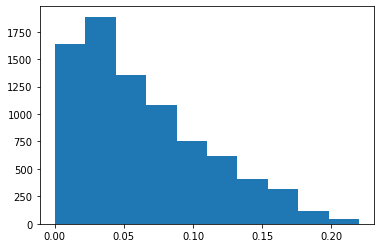

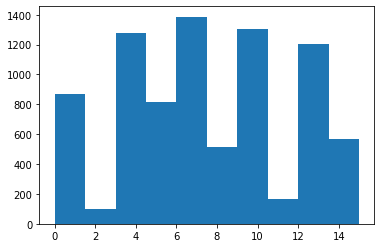

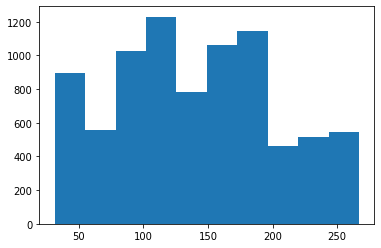

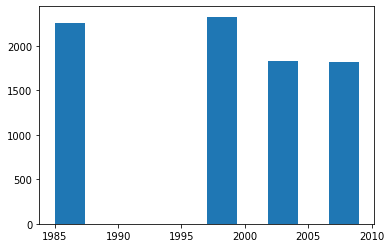

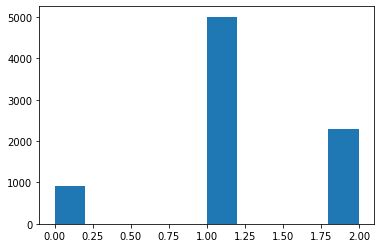

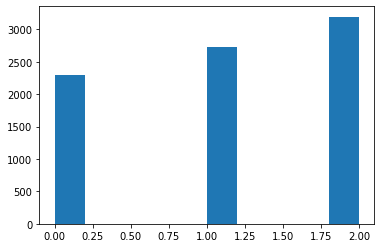

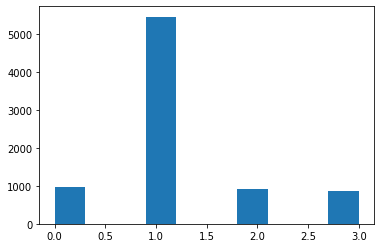

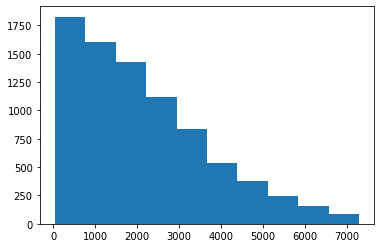

In [21]:
for i in df_train.columns:
    plt.figure()
    plt.hist(df_train[i])

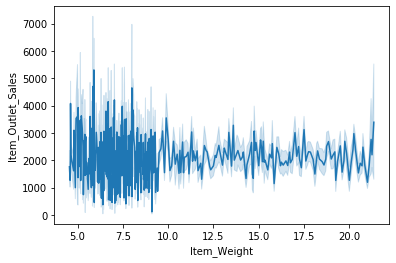

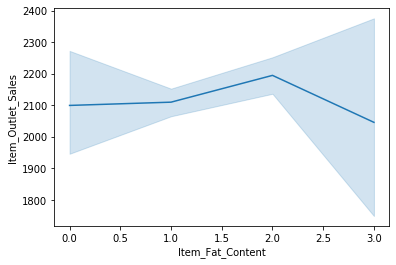

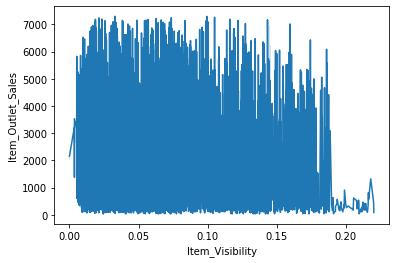

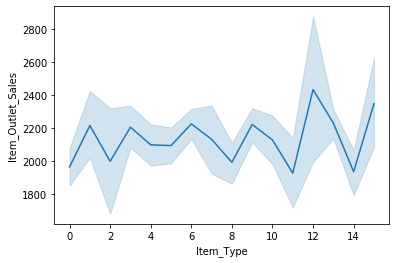

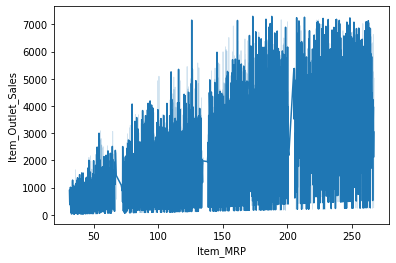

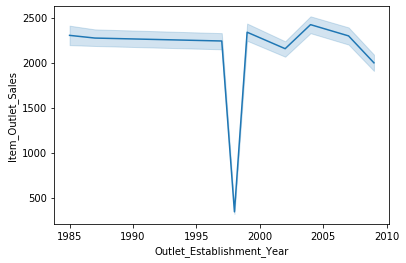

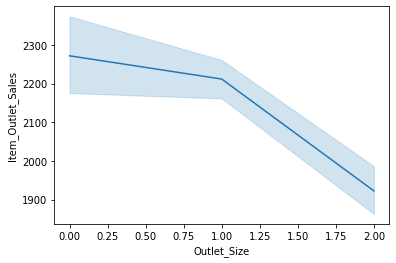

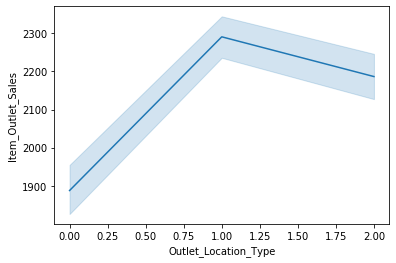

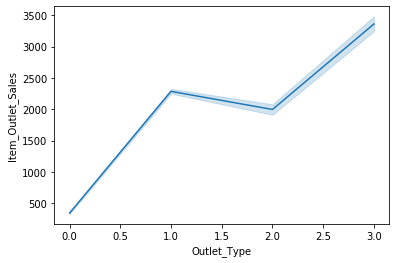

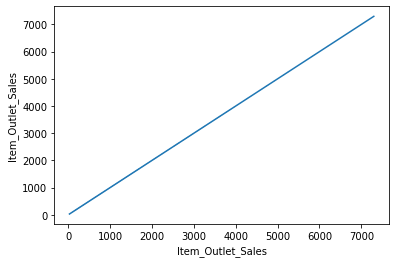

In [22]:
for i in df_train.columns:
    plt.figure()
    sns.lineplot(i,'Item_Outlet_Sales',data=df_train)

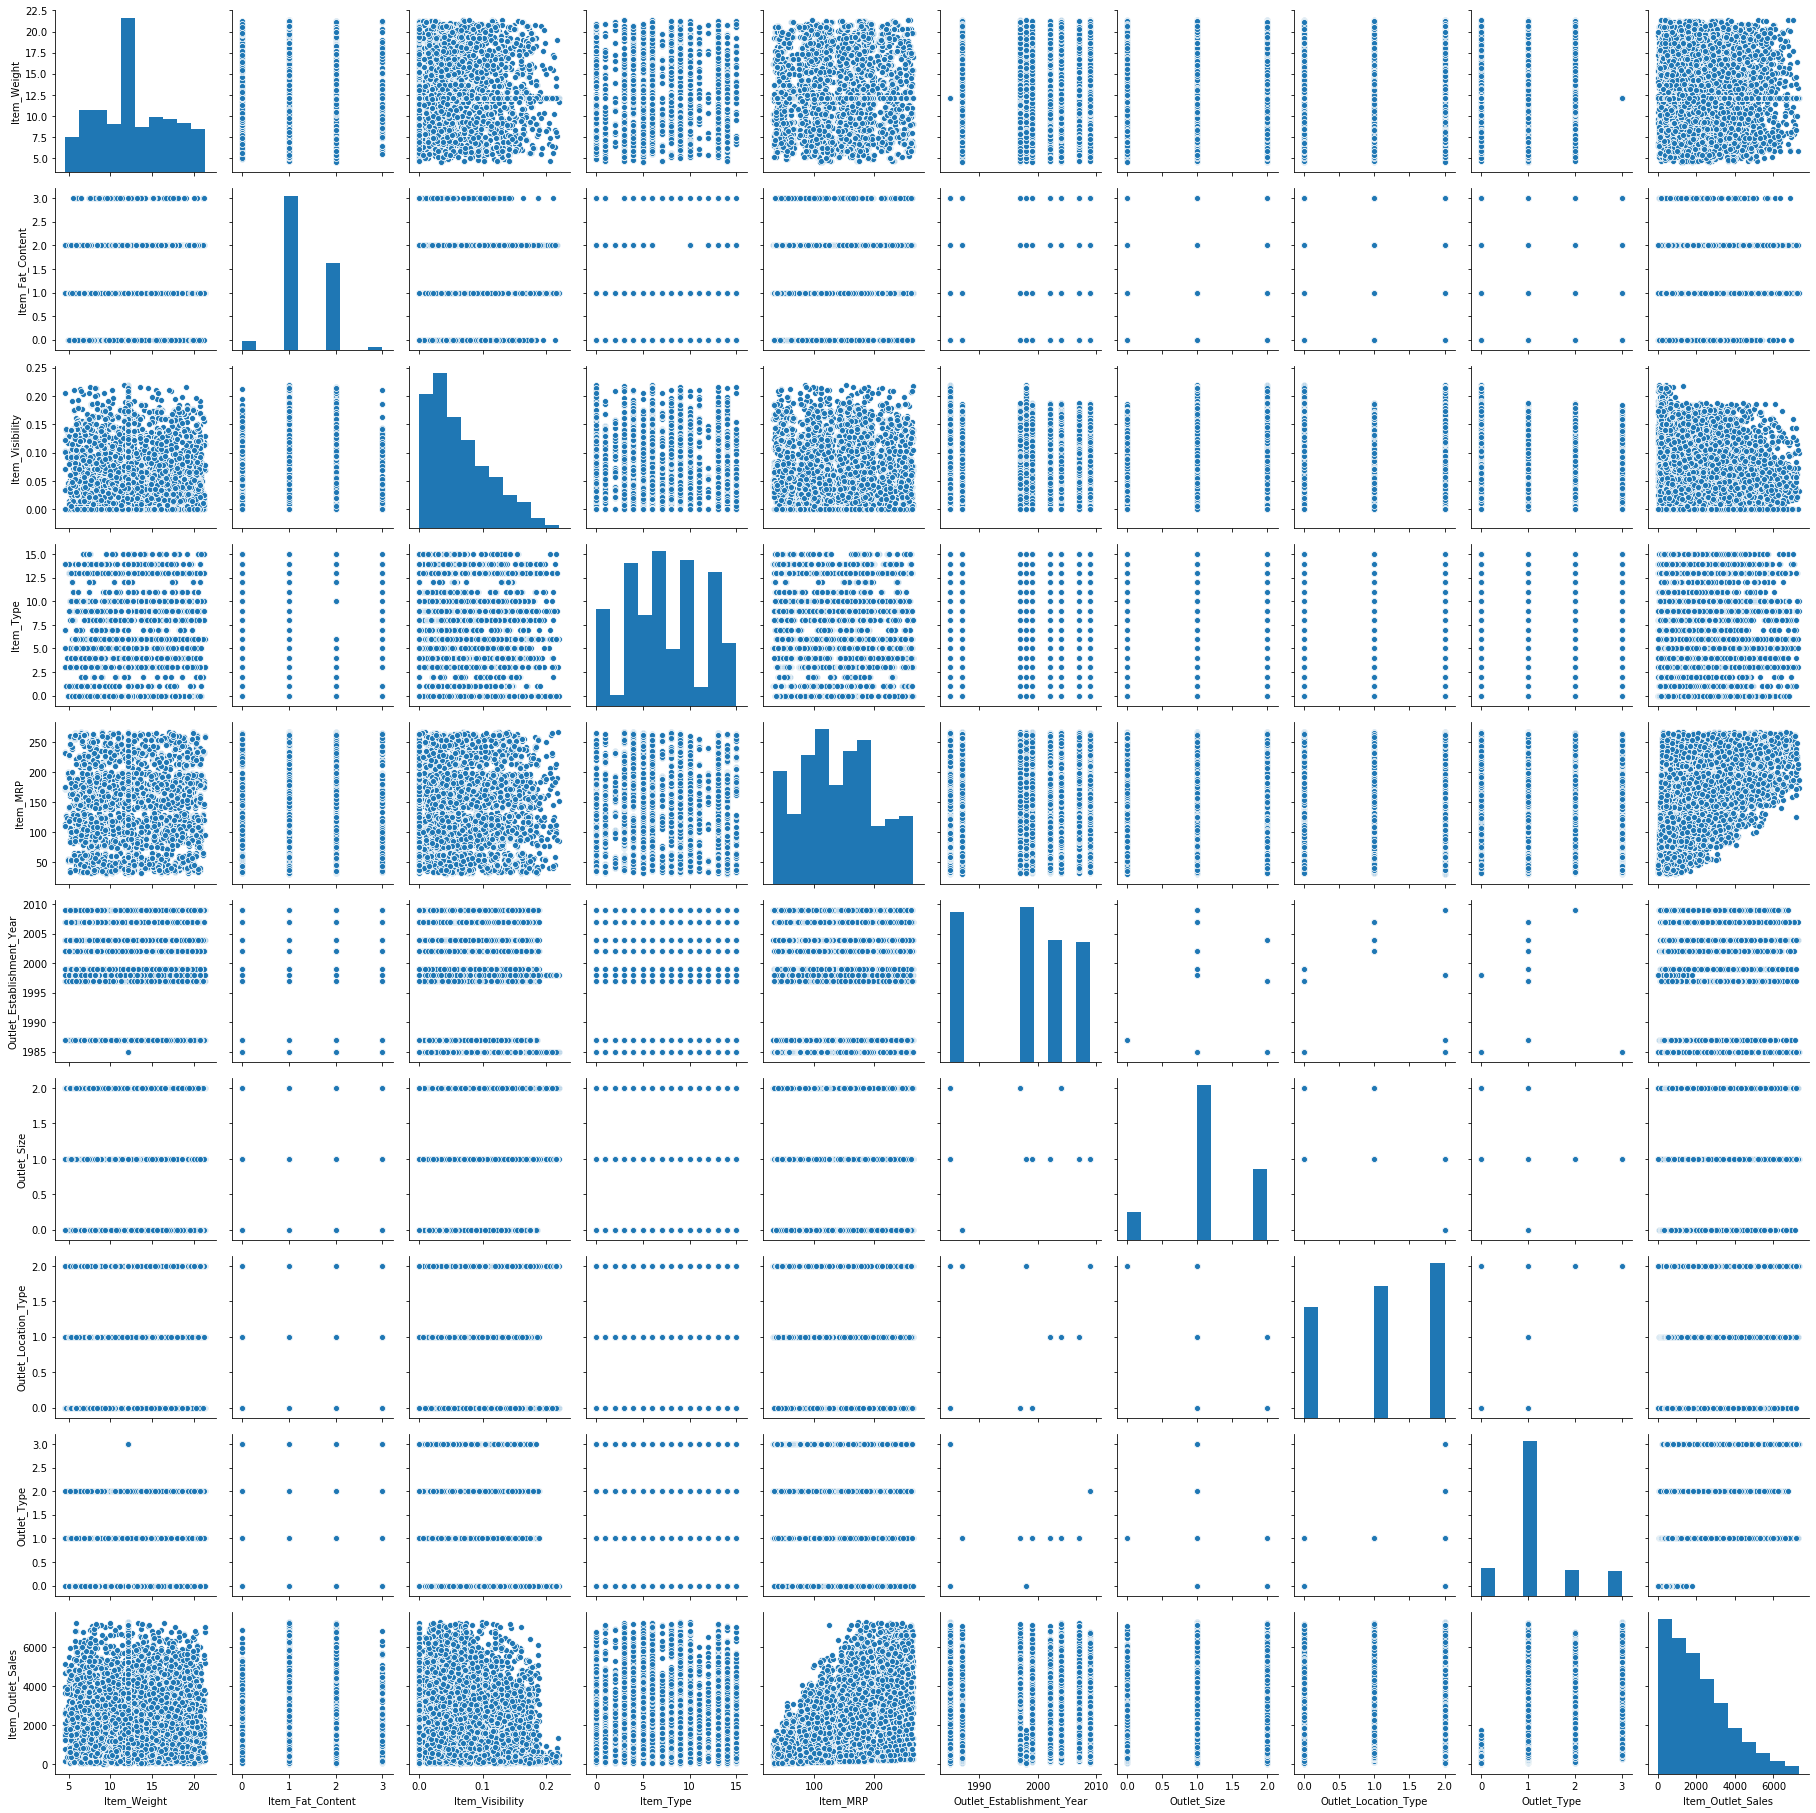

In [23]:
sns.pairplot(df_train)

KeyboardInterrupt: 

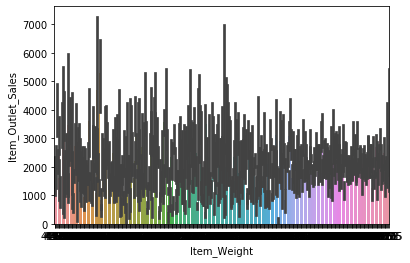

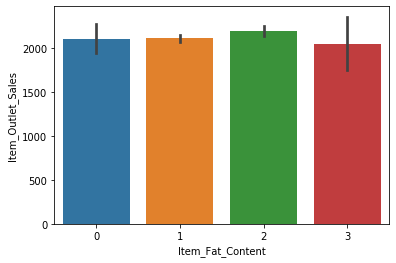

Error in callback <function flush_figures at 0x0000022F6C4DAB88> (for post_execute):


KeyboardInterrupt: 

In [25]:
for i in df_train.columns:
    plt.figure()
    sns.barplot(i,'Item_Outlet_Sales',data=df_train)

In [26]:
df_train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.019647,-0.013282,0.027832,0.026287,0.032937,-0.016463,-0.000300,-0.027826,0.007523
Item_Fat_Content,-0.019647,1.000000,0.039216,-0.126249,0.002854,-0.010542,-0.008840,-0.004478,0.000706,0.020618
Item_Visibility,-0.013282,0.039216,1.000000,-0.036583,0.001472,-0.044140,0.045678,-0.015106,-0.119910,-0.092554
Item_Type,0.027832,-0.126249,-0.036583,1.000000,0.031041,0.007952,0.001253,-0.000275,0.000651,0.015589
Item_MRP,0.026287,0.002854,0.001472,0.031041,1.000000,0.019437,0.006314,-0.004097,-0.022156,0.568176
Outlet_Establishment_Year,0.032937,-0.010542,-0.044140,0.007952,0.019437,1.000000,0.207683,-0.093957,-0.120397,-0.024280
Outlet_Size,-0.016463,-0.008840,0.045678,0.001253,0.006314,0.207683,1.000000,-0.611339,-0.194481,-0.078753
Outlet_Location_Type,-0.000300,-0.004478,-0.015106,-0.000275,-0.004097,-0.093957,-0.611339,1.000000,0.467156,0.069131
Outlet_Type,-0.027826,0.000706,-0.119910,0.000651,-0.022156,-0.120397,-0.194481,0.467156,1.000000,0.369614
Item_Outlet_Sales,0.007523,0.020618,-0.092554,0.015589,0.568176,-0.024280,-0.078753,0.069131,0.369614,1.000000


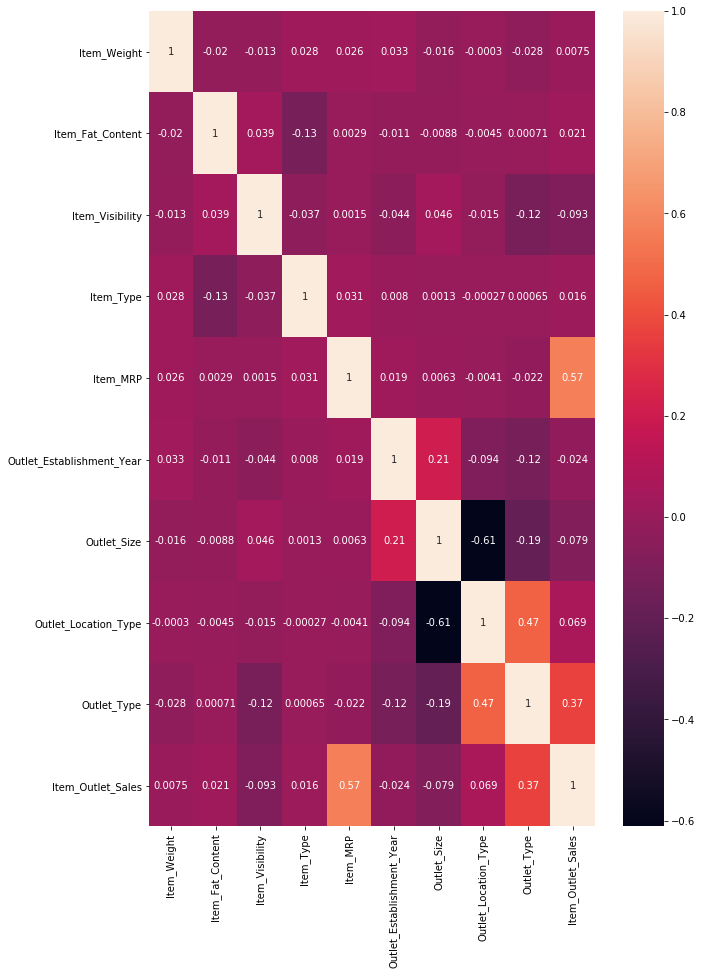

In [27]:
plt.figure(figsize=(10,15))
sns.heatmap(df_train.corr(),annot=True)

from eda we can deduce:
    outlet sales remains unchanged with change in item weight,item type,fat content and establishment year. Item type 12 has the highest sales.
    lower visibility has higher sales
    high mrp products has higher sales
    outlet size 0 & 1 has higher sales and 2 has lowest sales
    outlet location 1 has highest sales
    sales increses with outlet type increase from 0 to 3

No significant correlation between the variables except item mrp and outlet type has small positive correlation with sales.

In [ ]:
df_train

In [ ]:
x=df_train.drop(['Item_Outlet_Sales'],axis=1)
y=df_train['Item_Outlet_Sales']
y=y.values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
se=StandardScaler()
dx=se.fit_transform(x)
x=pd.DataFrame(dx,columns=x.columns)


In [ ]:
x

In [ ]:
dt=se.fit_transform(df_test)
df_test=pd.DataFrame(dt,columns=df_test.columns)

In [ ]:
y.shape

Modelling

In [ ]:
def max_score(model):
    max_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=r_state,test_size=0.20)
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        r2=r2_score(ytest,ypred)
        print('r2 score is',r2,'with r state',r_state)
        if r2>max_score:
            max_score=r2
            final_r_state=r_state
            print(max_score,'is max accuracy against r_state',final_r_state)
            print(cross_val_score(model,x,y,cv=10).mean())

In [ ]:
lr=LinearRegression()
max_score(lr)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
alpha={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
grid=GridSearchCV(estimator=Ridge(),param_grid=alpha)
grid.fit(x,y)
print(grid.best_params_)

In [ ]:
rd=Ridge(alpha=1)
max_score(rd)

In [ ]:
alpha={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
grid1=GridSearchCV(estimator=Lasso(),param_grid=alpha)
grid1.fit(x,y)
print(grid1.best_params_)

In [ ]:
ls=Lasso(alpha=1)
max_score(ls)

In [ ]:
alpha={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
grid=GridSearchCV(estimator=ElasticNet(),param_grid=alpha)
grid.fit(x,y)
print(grid.best_params_)

In [ ]:
en=ElasticNet(alpha=0.01)
max_score(en)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr=SVR(kernel='linear')

In [ ]:
max_score(svr)

since all models have same r2 score (approx) , linear model is selected

In [ ]:
lr=LinearRegression()
lr.fit(x,y)
ypred=lr.predict(df_test)


In [ ]:
print(ypred)

In [ ]:
joblib.dump(lr,'lr.bigdatamart.obj')